# Today's topics 

We will mainly explore some of the data provided the publications listed below. This will include downloading and importing data, describing numerical value columns in respect to the value distribution, and plot several relationships. The main goal is to familiarize yourself with the data while practicing how to use pandas. Feel free to explore other questions that may arise in addition to the tasks listed below.

The full publication that inspired some of the data analyses steps we'll do in this practical course was published in Science this year

__Systems proteomics of liver mitochondria function__      
by Evan G. Williams, Yibo Wu, Pooja Jha, Sébastien Dubuis et al.     
_Science_     
Volume 352(6291):[aad0189](http://science.sciencemag.org/content/352/6291/aad0189)    
June 10, 2016, [doi:10.1126/science.aad0189](doi:10.1126/science.aad0189)

The supplemental files are listed here: http://science.sciencemag.org/content/suppl/2016/06/10/352.6291.aad0189.DC1

We further include some methodology discussed in a related paper about mouse-human PheWAS

__Joint mouse–human phenome-wide association to test gene function and disease risk__
by Xusheng Wang, Ashutosh K. Pandey, Megan K. Mulligan, Evan G. Williams et al.     
_Nature Communications_     
Volume 7, Article number: 10464, [doi:10.1038/ncomms10464](doi:10.1038/ncomms10464)     

In [1]:
%matplotlib inline

In [2]:
import sys
import os

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import urllib

In [4]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


# Change some defaults

In [5]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1.5})

In [6]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Useful links
## Python packages
The following packages are essential for successful integrative bioinformatics studies. In general, they give you a good starting point for most basic exploratory analyses as well as the tools for in-depth data mangling and inference.

[pandas](http://pandas.pydata.org/)   
[numpy](https://docs.scipy.org/doc/numpy-dev/user/quickstart.html)       
[scipy](https://www.scipy.org/)      
[statsmodels](http://statsmodels.sourceforge.net/)    
[scikit-learn](http://scikit-learn.org/stable/)      
[ipython](https://ipython.org/)

## Jupyter notebooks
[Jupyter notebook docs](http://jupyter-notebook.readthedocs.io/en/latest/)       
[Ipython magics](https://ipython.org/ipython-doc/3/interactive/magics.html) (also work in jupyter)      
[Ipython widgets](https://ipywidgets.readthedocs.io/en/latest/) (also work in jupyter)      

## Data visualisation
[pandas visualisation](http://pandas.pydata.org/pandas-docs/stable/visualization.html)     
[matplotlib](http://matplotlib.org/index.html) - standard plotting lib for python     
[mpld3](http://mpld3.github.io/) - create interactive matplotlib figures     
[mpld3 notebook demo](https://mpld3.github.io/notebooks/mpld3_demo.html)      
[bokeh](http://bokeh.pydata.org/en/latest/) - interactive python plots      
[bokeh notebook demos](https://github.com/bokeh/bokeh-notebooks/tree/master/tutorial)     
[seaborn](https://stanford.edu/~mwaskom/software/seaborn/) - make plots look pretty + more plots  
[biocircos](http://bioinfo.ibp.ac.cn/biocircos/document/biocircos.html)      
[DatavizCatalog](http://www.datavizcatalogue.com/)     

## Learn/Improve your python skills
[python](https://www.python.org/)      
[codeacademy](https://www.codecademy.com/)      
[learnpython.org](http://www.learnpython.org/)    
[software carpentry for python](http://swcarpentry.github.io/python-novice-inflammation/)      
[software carpentry for git](http://swcarpentry.github.io/git-novice/)      
[coding style](http://docs.python-guide.org/en/latest/writing/style/)      

## Data Science/Programming help
[google](www.google.com)     
[stackoverflow](http://stackoverflow.com/)     
[quora](https://www.quora.com/)   
[yhat](http://blog.yhat.com/)        
[kaggle](https://www.kaggle.com/) - challenges, but also some examples of elegant data analysis

Reddit:      
[Python subreddit](https://www.reddit.com/r/python)     
[IPython subreddit](https://www.reddit.com/r/IPython)     
[pystats subreddit](https://www.reddit.com/r/pystats)    


## Bioinformatics help
[seqanswers](http://seqanswers.com/)      
[biostars](https://www.biostars.org/)     
[rosalind](http://rosalind.info/problems/locations/)      

## Tutorials
[scipy statistics intro](http://www.scipy-lectures.org/packages/statistics/index.html)         
[ipython cookbook](http://nbviewer.jupyter.org/github/ipython-books/cookbook-code/tree/master/notebooks/chapter03_notebook/)      
[Python Data Science Handbook - notebooks](https://github.com/jakevdp/PythonDataScienceHandbook/tree/master/code_listings)

# Download data

To perform a exploratory analysis one has to download the genotype data first. We are going to create a new directory, download the files and check if it worked.

In [7]:
# Create a subdirectory in which you will store all your in- and output files 
!mkdir data

# Download Genotype supplement .. 
urllib.urlretrieve("http://science.sciencemag.org/highwire/filestream/680254/field_highwire_adjunct_files/2/aad0189_DataFileS2.xlsx", "data/phenotype.xlsx")
urllib.urlretrieve("http://science.sciencemag.org/highwire/filestream/680254/field_highwire_adjunct_files/4/aad0189_DataFileS4.txt", "data/genotype.txt")

# .. and check if it worked
!ls data
os.startfile("data\genotype.txt", 'open')
os.startfile("data\phenotype.xlsx", 'open')

Ein Unterverzeichnis oder eine Datei mit dem Namen "data" existiert bereits.


genotype.txt
microarray.xlsx
phenotype.xlsx
sample_data.csv


WindowsError: [Error 1223] Der Vorgang wurde durch den Benutzer abgebrochen: 'data\\phenotype.xlsx'

# Genotype
The mouse genotype data is provided as a tab-delimited text file (you can check it's general structure using less in the command line or by opening the file in a text editor). To actually use the data in our program we need to load the genotype file into a pandas dataframe.

In [8]:
# Load genotype file into a pandas dataframe using the correct read function
genotype_df = pd.read_table("data/genotype.txt", comment = '@')

# Check if import worked by displaying the first 10 rows of the dataframe
genotype_df[1:11]

,Chr,Locus,cM,Mb,BXD1,BXD2,BXD5,BXD6,BXD8,BXD9,BXD11,BXD12,BXD13,BXD14,BXD15,BXD16,BXD18,BXD19,BXD20,BXD21,BXD22,BXD23,BXD24,BXD24a,BXD25,BXD27,BXD28,BXD29,BXD30,BXD31,BXD32,BXD33,BXD34,BXD35,BXD36,BXD37,BXD38,BXD39,BXD40,BXD41,BXD42,BXD43,BXD44,BXD45,BXD48,BXD48a,BXD49,BXD50,BXD51,BXD52,BXD53,BXD54,BXD55,BXD56,BXD59,BXD60,BXD61,BXD62,BXD63,BXD64,BXD65,BXD65a,BXD65b,BXD66,BXD67,BXD68,BXD69,BXD70,BXD71,BXD72,BXD73,BXD73a,BXD73b,BXD74,BXD75,BXD76,BXD77,BXD78,BXD79,BXD81,BXD83,BXD84,BXD85,BXD86,BXD87,BXD88,BXD89,BXD90,BXD91,BXD93,BXD94,BXD95,BXD98,BXD99,BXD100,BXD101,BXD102
1,1,rs6365999,0.000,4.811062,B,B,D,D,D,B,B,D,B,B,D,D,B,D,D,D,D,B,B,B,D,B,D,D,B,B,B,B,B,B,B,B,B,D,B,D,B,B,D,B,B,B,H,H,B,D,B,B,H,H,B,B,D,D,D,D,D,B,D,B,B,H,B,B,B,B,D,D,D,B,D,B,D,D,D,D,H,B,D,D,B,D,B,B,D,B,D,D,B,B,B,B,U
2,1,rs6376963,0.895,5.008089,B,B,D,D,D,B,B,D,B,B,D,D,B,D,D,D,D,B,B,B,D,B,D,D,B,B,B,B,B,B,B,B,B,D,B,D,B,D,D,B,B,B,H,H,B,B,B,B,H,H,B,B,D,D,D,D,B,B,D,B,B,H,B,B,B,B,D,D,D,B,D,B,D,D,D,D,H,B,D,D,B,D,B,B,D,B,D,D,B,B,B,B,U
3,1,rs3677817,1.185,5.176058,B,B,D,D,D,B,B,D,B,B,D,D,B,D,D,D,D,B,B,B,D,B,D,D,B,B,B,B,B,B,B,B,B,D,B,D,B,D,D,B,B,B,H,H,B,B,B,B,H,H,B,B,D,D,D,D,B,B,D,B,B,D,B,B,B,B,D,D,D,B,D,B,D,D,B,D,H,B,D,D,B,D,B,B,D,B,D,D,B,B,B,B,U
4,1,rs8236463,2.081,5.579193,B,B,D,D,D,B,D,D,B,B,D,D,B,D,D,D,D,B,B,B,D,B,D,D,B,B,B,B,B,B,B,B,B,D,B,D,B,D,D,B,B,B,H,H,B,B,B,B,H,H,B,B,D,D,D,D,B,B,D,B,B,D,B,B,B,B,D,D,D,B,D,B,B,D,B,B,H,B,D,D,B,D,B,B,D,B,D,D,B,B,B,B,U
5,1,rs6333200,2.081,6.217921,B,B,D,D,D,B,D,D,B,B,D,D,B,D,D,D,D,B,B,B,D,B,D,D,B,B,B,B,B,B,B,B,B,D,B,D,B,D,D,B,B,B,H,H,B,B,B,B,H,H,B,B,D,D,D,D,B,B,D,B,B,D,B,B,B,B,D,D,D,B,D,B,B,D,B,B,H,B,D,D,B,D,B,B,D,B,D,D,B,B,B,B,U
6,1,rs6298633,2.367,6.820241,B,B,D,D,D,B,D,D,B,B,D,D,B,D,D,D,D,B,B,B,D,B,D,D,B,B,B,B,B,B,B,B,B,D,B,D,B,D,D,B,B,B,H,B,B,B,B,B,H,H,B,B,D,D,D,D,B,B,D,B,B,D,B,B,B,B,D,D,D,B,D,B,B,D,B,B,H,B,D,D,B,D,B,B,D,B,D,D,B,B,B,B,U
7,1,rs6241531,2.367,9.995925,B,B,D,D,D,B,D,D,B,B,D,D,B,D,D,D,D,B,B,B,D,B,D,D,B,B,B,B,B,B,B,B,B,D,B,D,B,D,D,B,B,B,H,B,B,B,B,B,H,H,B,B,D,D,D,D,B,B,D,B,B,D,B,B,B,B,D,D,D,B,D,B,B,D,B,B,H,B,D,D,B,D,B,B,D,B,D,D,B,B,B,B,D
8,1,rs6360236,3.263,11.073904,B,B,D,D,D,B,D,D,B,B,D,D,B,D,D,D,D,B,B,B,D,B,D,D,B,B,B,D,B,B,B,B,B,D,B,D,B,D,D,B,B,B,H,B,B,B,B,B,H,H,D,B,D,D,D,D,B,B,D,B,B,D,B,B,B,D,D,D,D,B,D,B,B,D,B,B,H,B,D,D,B,D,B,B,D,B,D,D,B,B,B,B,D
9,1,rs3722996,3.263,11.259432,B,B,D,D,D,B,D,D,B,B,D,D,B,D,D,D,D,B,B,B,D,B,D,D,B,B,B,D,B,B,B,B,B,D,B,D,B,D,D,B,B,B,H,B,B,B,B,B,H,H,D,B,D,D,D,D,B,B,D,B,B,D,B,B,B,D,D,D,D,B,D,B,B,D,B,B,H,B,D,D,B,D,B,B,D,B,D,D,B,B,B,B,D
10,1,D1Mit1,3.549,11.505582,B,B,D,D,D,B,D,D,B,B,D,D,B,D,D,D,D,B,B,B,D,B,D,D,B,B,B,D,B,B,B,B,B,D,B,D,B,D,D,B,B,B,D,B,B,B,B,B,H,H,D,B,D,D,D,D,B,B,D,B,B,D,B,B,B,D,D,D,D,B,D,B,B,D,B,B,D,B,D,D,B,D,B,B,D,B,D,D,B,B,B,B,D


Before we can start analysing the data, we need to have a closer look at them and make sure we understand what the data contains. Each row corresponds to one single-nucleotide polymorphism in a mouse sample and the columns 'Chr', 'Locus', 'cM' and 'Mb' represent the chromosome, the locus, the genetic distance measured in centimorgan and the length of the genome sample measured in mega bases.  
The columns with BXD represent the different strains and contain the information about the alleles. D means there is a paternal allel, B means there is a maternal allel, H means hetero allel and U means the allel is unknown.  


In [9]:
# How many SNPs are defined in the genotype file
print("There are " + str(genotype_df.shape[0]) + " SNPs defined in the genotype file.")

# How many different strains are included in the genotype file
print("There are " + str("".join(list(genotype_df.columns.values)).count("BXD")) + " different strains in the genotype file.")    

There are 3811 SNPs defined in the genotype file.
There are 93 different strains in the genotype file.


The start the analysis of the data, we will plot the distribution patterns of maternal and paternal alleles across strains and SNPs:

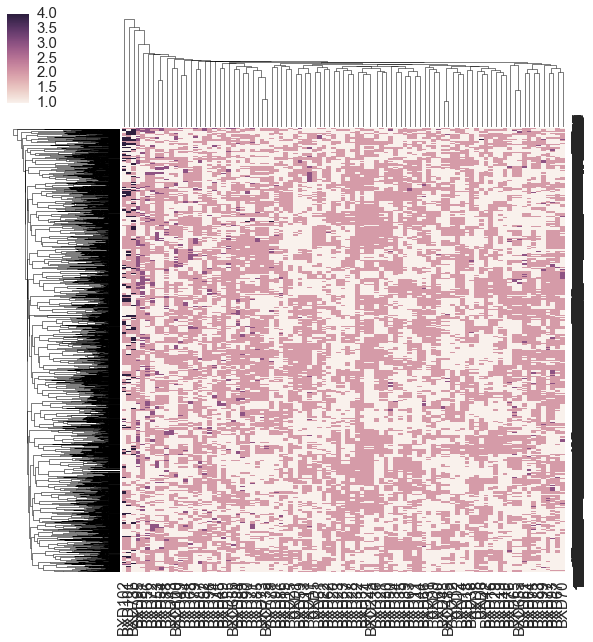

In [10]:
# Convert cell values to numbers
mapping = {'B': 1,'D': 2, 'H': 3, 'U': 4}
genotype_df_copy = genotype_df.replace(mapping)

# Plot clustered heatmap 
# get the columns with "BXD" header
BXD_cols = [i for i in genotype_df.columns.values if "BXD" in i]

# plot the clustermap
plt.figure(figsize=(16,9));
sns.clustermap(genotype_df_copy[BXD_cols]);

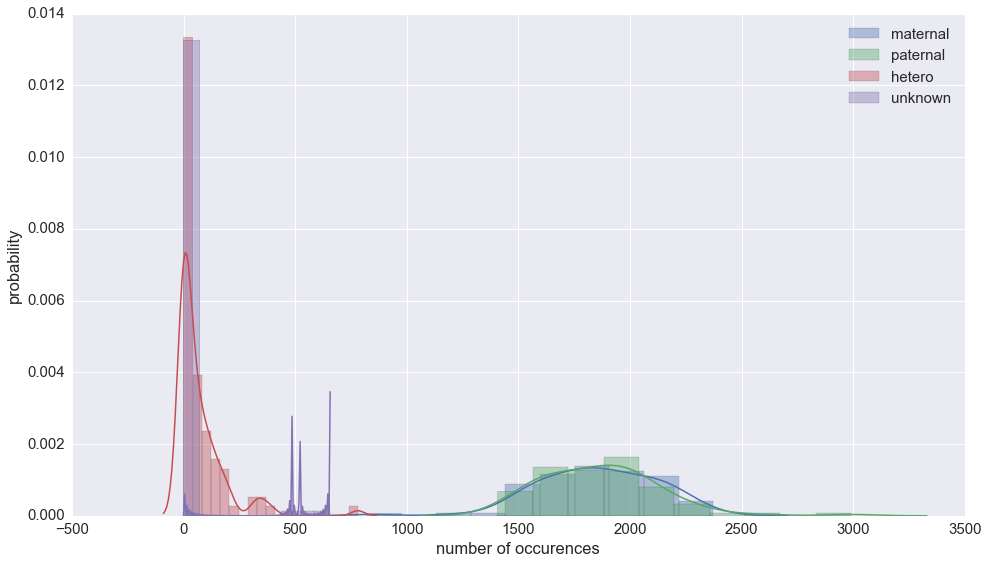

In [11]:
# Plot distribution of maternal, paternal, hetero and unknown alleles

# count the occurrences
distr_df = genotype_df_copy[BXD_cols].apply(pd.value_counts).fillna(0)

# create a distplot
plt.figure(figsize=(16,9));
sns.distplot(distr_df.iloc[0], label="maternal");
sns.distplot(distr_df.iloc[1], label="paternal");
sns.distplot(distr_df.iloc[2], label="hetero");
sns.distplot(distr_df.iloc[3], label="unknown");
plt.xlabel('number of occurences')
plt.ylabel('probability')
plt.legend();

# Phenotype
The BXD mouse phenotype data has been accumulated over the past 50 years and with various measurements being available for different mice and different tissue types. The data provided by the paper supplement is structured as a multi-sheet EXCEL spreadsheet - you can open it in the corresponding software to get a first impression about the structure of the file. Obviously we need to store the phenotype data similiar to the genotype data in a pandas dataframe:

In [12]:
# Load phenotype file into a pandas dataframe using the correct read function (keep all sheets)
phenotype_df = pd.read_excel("data/phenotype.xlsx", sheetname=None)

To check whether it worked correctly, we'll take a look at the sheet names, list all of them and take a more detailed look in one of them:

In [13]:
# List all sheet names
print phenotype_df.keys()

# Take a peek into the different sheets based on their respective name
# Note: This is not printed via the print function, because the output would be otherwise pretty messy.. Also note that only 
# the tail is printed, since its the last function which is called in the cell. 
phenotype_df["TSE"].head()
phenotype_df["TSE"].tail()

[u'CLAMS', u'ColdTest', u'Biochemistry', u'TSE', u'Hematology', u'OGTT', u'Activity Wheel', u'NIBP', u'NEW', u'VO2Max', u'Body Wt & Composition', u'Tissue_W']


,@format=column,CD_24hXYTot_TSE_[#/hr],SE,N,HFD_24hXYTot_TSE_[#/hr],SE.1,N.1,CD_DayXYTot_TSE_[#/hr],SE.2,N.2,HFD_DayXYTot_TSE_[#/hr],SE.3,N.3,CD_NightXYTot_TSE_[#/hr],SE.4,N.4,HFD_NightXYTot_TSE_[#/hr],SE.5,N.5,CD_24hZTot_TSE_[#/hr],SE.6,N.6,HFD_24hZTot_TSE_[#/hr],SE.7,N.7,CD_DayZTot_TSE_[#/hr],SE.8,N.8,HFD_DayZTot_TSE_[#/hr],SE.9,N.9,CD_NightZTot_TSE_[#/hr],SE.10,N.10,HFD_NightZTot_TSE_[#/hr],SE.11,N.11,CD_FoodInTotal_TSE_[g],SE.12,N.12,HFD_FoodInTotal_TSE_[g],SE.13,N.13,CD_FoodInTotal_TSE_[kCal],SE.14,N.14,HFD_FoodInTotal_TSE_[kCal],SE.15,N.15,Kcal_Intake_HFD_24H_[(g_food*3.1kcal/g)/g_BW*100],SE.16,N.16,Kcal_Intake_HFD_24H_[(g_food*5.1kcal/g)/g_BW*100],SE.17,N.17,BodyWeight_TSE_CD,SE.18,N.18,BodyWeight_TSE_HFD,SE.19,N.19
52,BXD95,3406.0,281.0,4,2851,305,5,2481.0,120.0,4,2053,229,5,4331,565.0,4,3515,371,5,505,51,4,132,11,4,315,70,4,43,14.8,4,695,106,4,210,19,4,2.34,0.530000,4,2.56,0.24,5,7.254,1.65,4,13.06,1.23,5,20.627935,4.445884,4,24.7388,1.55795,5,35.32,2.12,4,52.32,2.31,5
53,BXD98,3785.0,192.0,4,2931,71,5,2372.0,26.0,4,2196,185,5,4980,355.0,4,3552,157,5,421,112,4,231,65,5,266,118,4,164,56,5,552,128,4,287,78,5,3.99,0.155000,4,3.41,0.229,5,12.369,0.48,4,17.38,1.169,5,34.839682,1.138045,4,33.5965,2.25349,5,35.60,1.49,4,51.77,1.11,5
54,BXD99,4548.0,297.0,5,3905,377,5,2688.0,354.0,5,2900,383,5,6253,536.0,5,4826,594,5,692,95,5,541,55,5,202,52,5,218,56,5,1142,149,5,837,105,5,2.75,0.360000,5,3.19,0.29,2,8.525,1.12,5,16.27,1.48,2,21.281401,2.900142,5,40.7678,14.1767,2,39.91,0.44,5,52.42,2.01,5
55,BXD100,4149.0,990.0,3,3302,426,5,1981.0,256.0,3,2303,330,5,6316,1872.0,3,4302,610,5,504,28,3,246,48,5,250,46,3,151,35,5,759,74,3,342,71,5,5.34,0.107858,3,3.685,0.475,2,16.554,0.334359,3,18.7935,2.4225,2,44.436983,7.174120,3,34.0984,6.39789,2,39.40,6.66,3,55.1,1.77,5
56,BXD101,5817.0,359.0,4,3666,301,4,3302.0,285.0,4,2100,210,4,8332,447.0,4,5233,508,4,790,93,2,290,76,4,245,131,2,127,85,4,1335,55,2,453,73,4,2.18,0.170000,4,x,x,x,6.758,0.51,4,x,x,x,20.449398,2.661498,4,36.1735,x,1,33.83,1.91,4,52.24,1.13,4


In [14]:
# List the first columns in the Biochemistry sheet
print list(phenotype_df["Biochemistry"].columns.values)[1:8]

[u'CD_Glucose_[mmol/L]', u'SE', u'N', u'HFD_Glucose_[mmol/L]', u'SE.1', u'N.1', u'CD_Cholesterol_[mmol/L]']


# Analysis

Since everything worked so far, we are now going to start with the actual data analysis. We are going to study the  variability of response across different strains for some of the measured phenotypes. We will start with the activity on the wheel, because its pretty easy to interpret. At first we're going to compare the activity on the activity wheel across strains (daily, nightly and 24h measurements) for the HFD diet:

## Task: Study the variability of response across different strains for some of the measured phenotypes:

Examples:
- activity on the wheel
- basal body temperature
- alkaline phosphatase (ALPL) protein activity level
- weight after 28 weeks



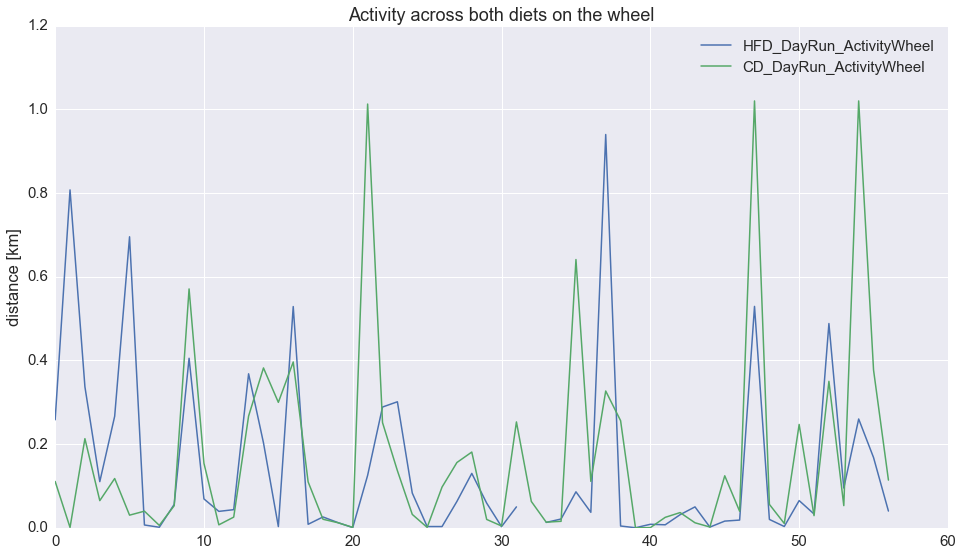

In [26]:
# get all measurements for the diets
day = ["HFD_DayRun_ActivityWheel_[km]","CD_DayRun_ActivityWheel_[km]"]

# replace invalid values
temp_day = activity[day].copy()
temp_day.replace('x', np.nan, inplace=True)
temp_day.dropna()

# plot the measurements
plt.figure(figsize=(16,9));
plt.plot(temp_day.values[:,0], label="HFD_DayRun_ActivityWheel");
plt.plot(temp_day.values[:,1], label="CD_DayRun_ActivityWheel");
plt.ylabel('distance [km]')
plt.title('Activity across both diets on the wheel')
plt.legend();

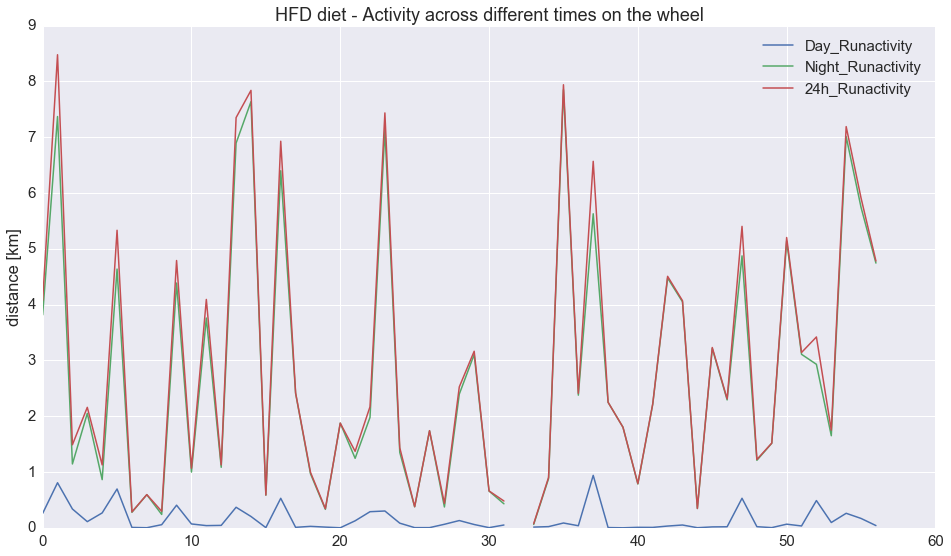

In [23]:
# get the sheet containing the activity measurements
activity = phenotype_df["Activity Wheel"]

# get all measurements for HFD diet
hfd_diet = ["HFD_DayRun_ActivityWheel_[km]","HFD_NightRun_ActivityWheel_[km]","HFD_24hRun_ActivityWheel_[km]"]

# drop invalid values
temp_hfd_diet = activity[hfd_diet].copy()
temp_hfd_diet.replace('x', np.nan, inplace=True)
temp_hfd_diet.dropna()

# plot the measurements
plt.figure(figsize=(16,9));
plt.plot(temp_hfd_diet.values[:,0], label="Day_Runactivity");
plt.plot(temp_hfd_diet.values[:,1], label="Night_Runactivity");
plt.plot(temp_hfd_diet.values[:,2], label="24h_Runactivity");
plt.ylabel('distance [km]')
plt.title('HFD diet - Activity across different times on the wheel')
plt.legend();

To analyse the difference between the two different diets further we're going to compare them for several biochemistry measurements, the CLAMS measurements and the Cold Test data:

In [49]:
def replace_invalid(pandas_series, invalid_value='x'):
    """ Replaces invalid values (default: x) with nan in a pandas series.
        
        pandas_series: the series to work on
        invalid_value: the value to replace
        return: copy of the series with replaced values
    """
    return pandas_series.replace(invalid_value, np.nan, inplace=False)    



def find_comparable_measurements(a_phenotype_df, diet1='HFD', diet2='CD', verbose=False):
    """ Find measurements to compare(columns which include the diet name)
    
        a_phenotype_df: pandas dataframe to analyze
        diet1: identifier of diet1
        diet2: identifier of diet2
        verbose: prints one list containing the measurements to the console
    """
    
    # iterate over each column names and add the current column name to the list if diet1/diet2 is in the column name
    diet1_measurement = [a for a in list(a_phenotype_df.columns.values) if diet1 in a]
    diet2_measurement = [a for a in list(a_phenotype_df.columns.values) if diet2 in a]
    
    if verbose:
        print(diet1_measurement)
    
    # return both lists
    return diet1_measurement, diet2_measurement

def compare_phenotypes(sheetname, data_frame, diet1='HFD', diet2='CD', verbose=False, n=5, diet1_measures=[], 
                      diet2_measures=[], random=True):
    """ Compares phenotypes via their sheetname. Plots up to n different measurements for the two diets in one plot.
    
        sheetname: sheetname of the measurements to compare (e.g. Biochemistry)
        data_frame: pandas dataframe containing ALL the data
        diet1: name/identifier of the first diet 
        diet2: name/identifier of the second deit
        verbose: argument for find_comparable_measurements
        n: number of measurements
        diet1_measures: explicit definition of measurements
        diet2_measures: explicit definition of measurements
        random: if number of possible plots is > than n, choose the n plots by chance
    """
    
    # get the data in the sheet
    sheet_data = data_frame[sheetname]
    
    # get comparable measurements (=columns which include diet1/diet2), if there are no given
    # Note: we assume that if there is a column for diet1 there's also one for diet2
    if len(diet1_measures) < 1 or len(diet2_measures) < 1:
        diet1_measurements, diet2_measurements = find_comparable_measurements(sheet_data, diet1, diet2, verbose)
    else:
        diet1_measurements = diet1_measures
        diet2_measurements = diet2_measures
      
    # get the data for the measurements
    diet1_data = sheet_data[diet1_measurements[:n]]
    diet2_data = sheet_data[diet2_measurements[:n]]
   
    # replace the invalid values (=x)
    replaced_diet1_data = replace_invalid(diet1_data)
    replaced_diet2_data = replace_invalid(diet2_data)
    
    # plot the measurements
    ax = replaced_diet1_data.plot(figsize=(16, 9));
    replaced_diet2_data.plot(ax=ax, figsize=(16, 9));
    plt.ylabel('measured value')
    plt.title("Comparison of the two diets for "  + sheetname + " measurements")
    plt.legend()

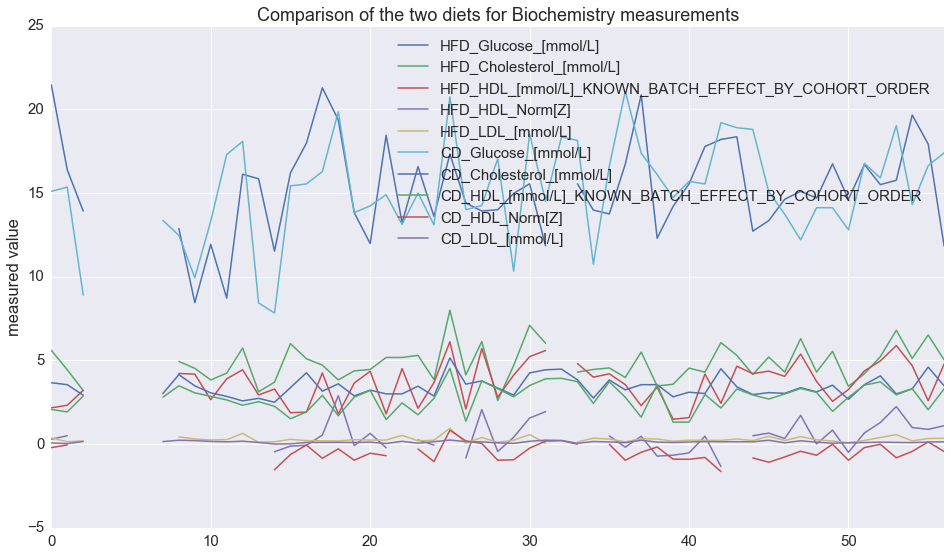

In [50]:
compare_phenotypes("Biochemistry", phenotype_df, n=5)

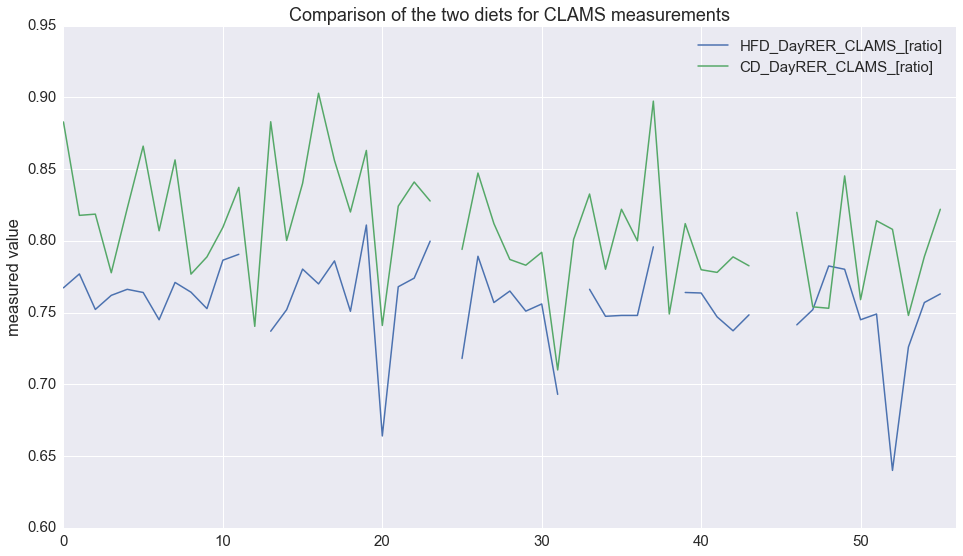

In [51]:
compare_phenotypes("CLAMS", phenotype_df, n=1)

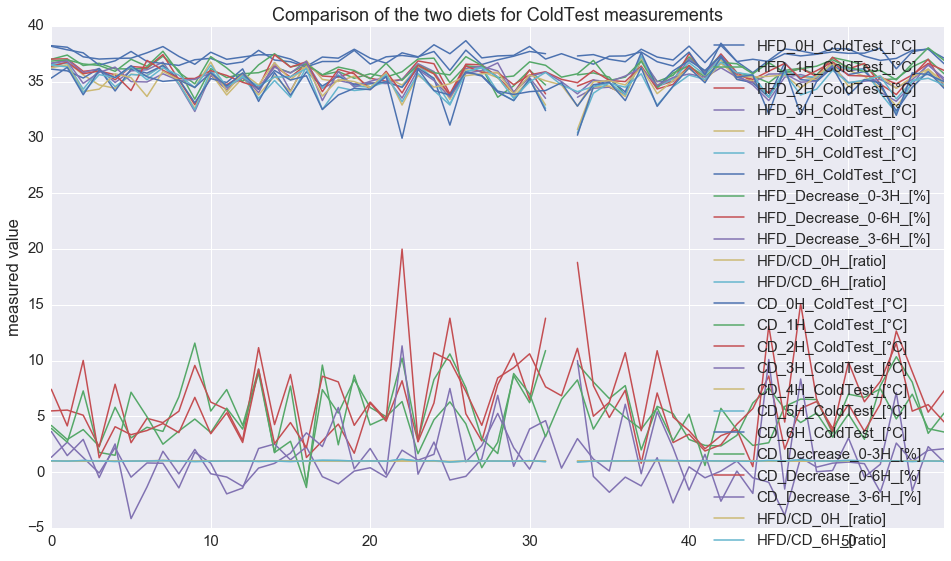

In [52]:
compare_phenotypes("ColdTest", phenotype_df, n=500)

Since comparing absolute values is harder than comparing percentages, we will compare the % change in weight and mass across different strains and both different diets. 

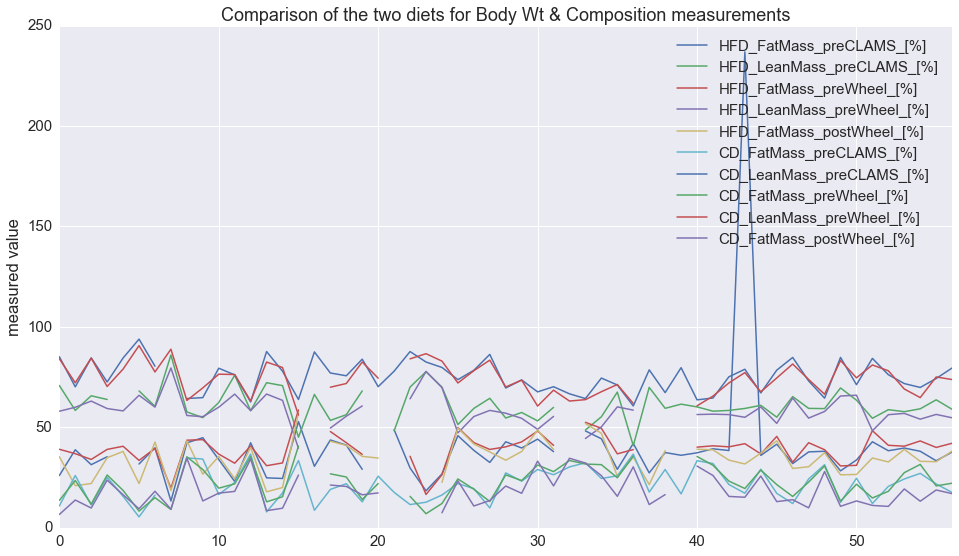

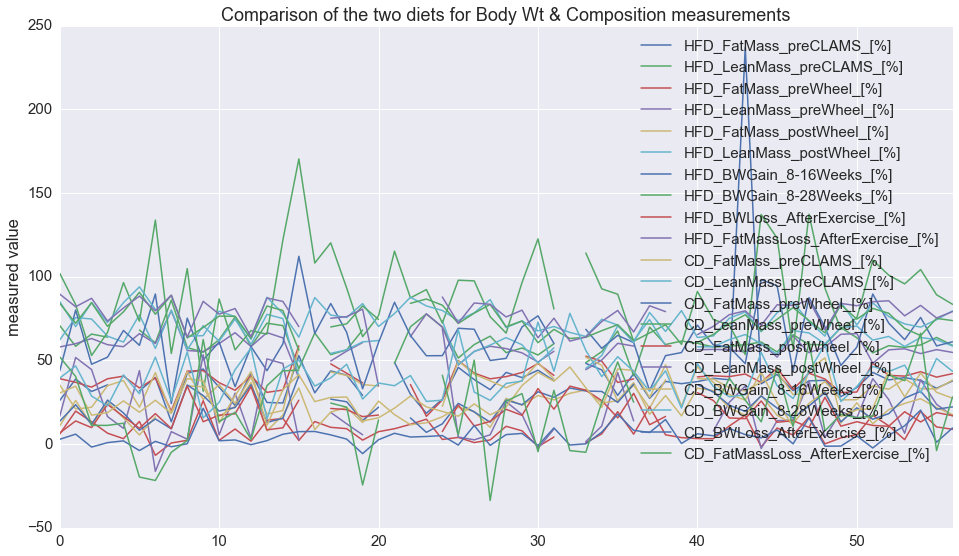

In [60]:
# the columns to compare: 
hfd_diet_percentages = ["HFD_FatMass_preCLAMS_[%]","HFD_LeanMass_preCLAMS_[%]","HFD_FatMass_preWheel_[%]",
                        "HFD_LeanMass_preWheel_[%]","HFD_FatMass_postWheel_[%]","HFD_LeanMass_postWheel_[%]",
                        "HFD_BWGain_8-16Weeks_[%]","HFD_BWGain_8-28Weeks_[%]","HFD_BWLoss_AfterExercise_[%]",
                        "HFD_FatMassLoss_AfterExercise_[%]"]

# the columns to compare: 
cd_diet_percentages = ["CD_FatMass_preCLAMS_[%]","CD_LeanMass_preCLAMS_[%]","CD_FatMass_preWheel_[%]",
                        "CD_LeanMass_preWheel_[%]","CD_FatMass_postWheel_[%]","CD_LeanMass_postWheel_[%]",
                        "CD_BWGain_8-16Weeks_[%]","CD_BWGain_8-28Weeks_[%]","CD_BWLoss_AfterExercise_[%]",
                        "CD_FatMassLoss_AfterExercise_[%]"]

# Create a plot
# .. using 5 measurements per diet
compare_phenotypes("Body Wt & Composition", phenotype_df, n=5, diet1_measures=hfd_diet_percentages, 
                   diet2_measures=cd_diet_percentages)

# .. using all measurements per diet
compare_phenotypes("Body Wt & Composition", phenotype_df, n=100, diet1_measures=hfd_diet_percentages, 
                   diet2_measures=cd_diet_percentages)

To see whether certian biochemical measurements correlate with the fitness measurements or blood parameters one uses usually simple linear regression: 

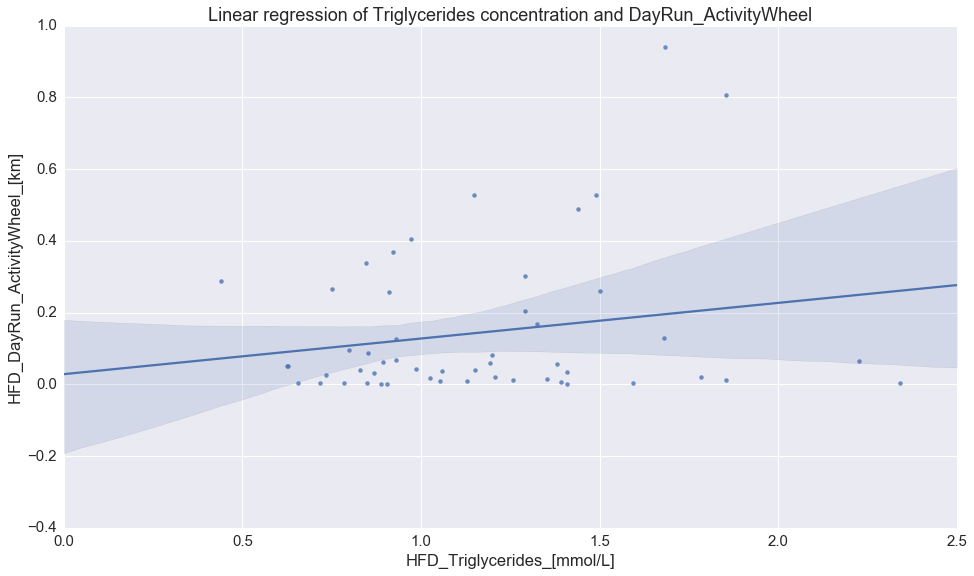

In [63]:
# Plot the linear dependence of pairs of phenotypes
data1 = phenotype_df["Biochemistry"]["HFD_Triglycerides_[mmol/L]"].replace('x', np.nan, inplace=False) 
data2 = phenotype_df["Activity Wheel"]["HFD_DayRun_ActivityWheel_[km]"].replace('x', np.nan, inplace=False) 

data_both1 = pd.concat([data1,data2],axis=1)

plt.figure(figsize=(16, 9))
plt.title("Linear regression of HFD_Triglycerides concentration and HFD_DayRun_ActivityWheel")
sns.regplot(x="HFD_Triglycerides_[mmol/L]", y="HFD_DayRun_ActivityWheel_[km]", data=data_both1);

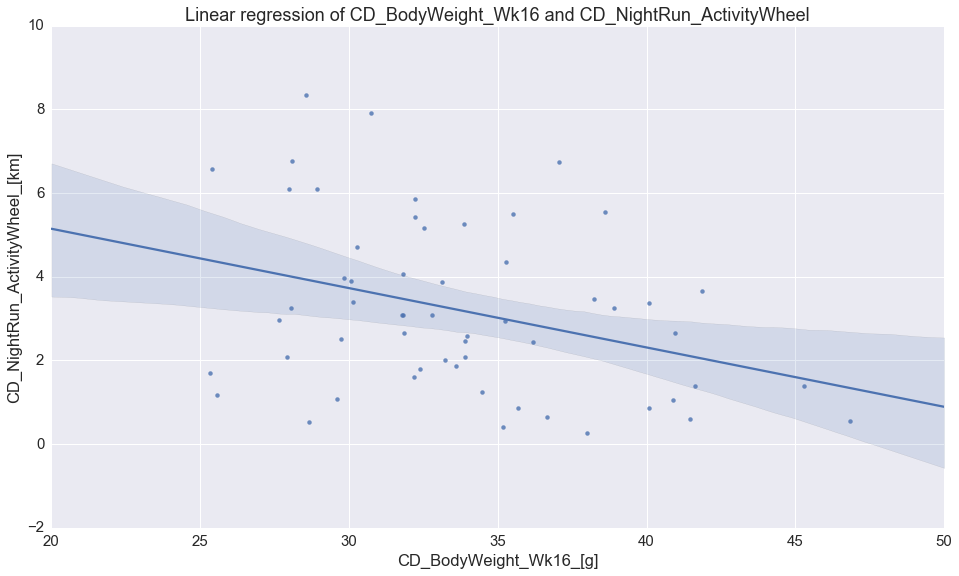

In [68]:
data1 = phenotype_df["Body Wt & Composition"]["CD_BodyWeight_Wk16_[g]"].replace('x', np.nan, inplace=False) 
data2 = phenotype_df["Activity Wheel"]["CD_NightRun_ActivityWheel_[km]"].replace('x', np.nan, inplace=False) 

data_both1 = pd.concat([data1,data2],axis=1)

plt.figure(figsize=(16, 9))
plt.title("Linear regression of CD_BodyWeight_Wk16 and CD_NightRun_ActivityWheel")
sns.regplot(x="CD_BodyWeight_Wk16_[g]", y="CD_NightRun_ActivityWheel_[km]", data=data_both1);

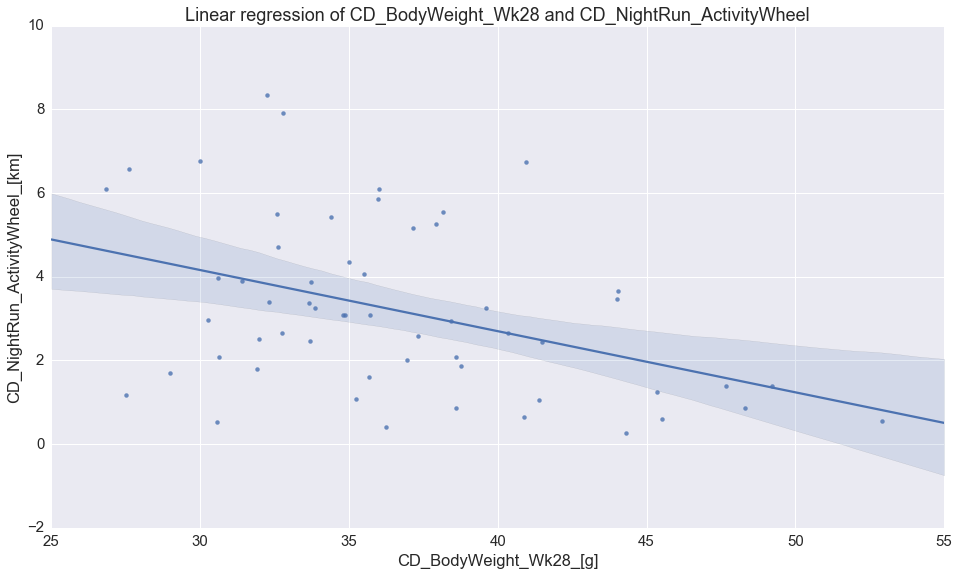

In [67]:
data1 = phenotype_df["Body Wt & Composition"]["CD_BodyWeight_Wk28_[g]"].replace('x', np.nan, inplace=False) 
data2 = phenotype_df["Activity Wheel"]["CD_NightRun_ActivityWheel_[km]"].replace('x', np.nan, inplace=False) 

data_both1 = pd.concat([data1,data2],axis=1)

plt.figure(figsize=(16, 9))
plt.title("Linear regression of CD_BodyWeight_Wk28 and CD_NightRun_ActivityWheel")
sns.regplot(x="CD_BodyWeight_Wk28_[g]", y="CD_NightRun_ActivityWheel_[km]", data=data_both1);

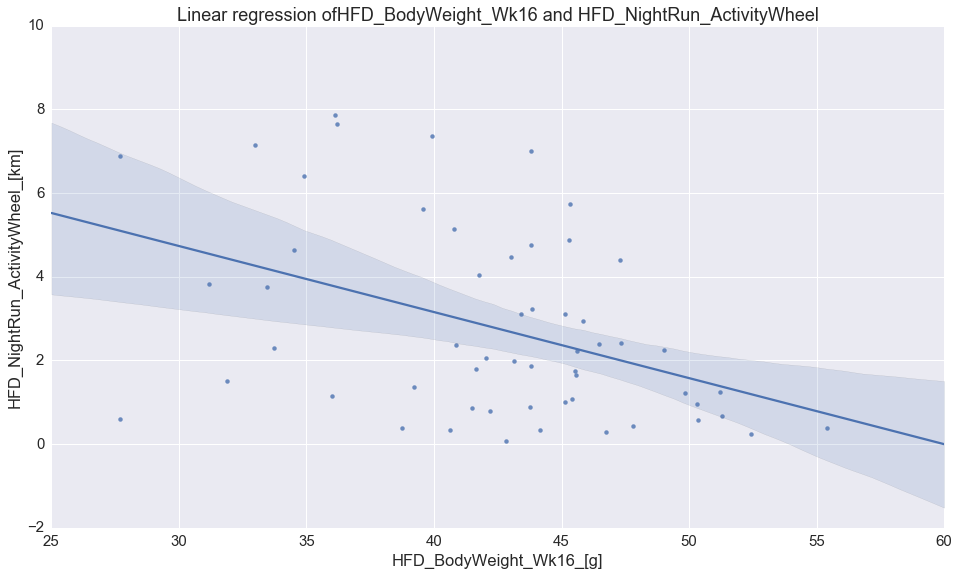

In [71]:
data1 = phenotype_df["Body Wt & Composition"]["HFD_BodyWeight_Wk16_[g]"].replace('x', np.nan, inplace=False) 
data2 = phenotype_df["Activity Wheel"]["HFD_NightRun_ActivityWheel_[km]"].replace('x', np.nan, inplace=False) 

data_both1 = pd.concat([data1,data2],axis=1)

plt.figure(figsize=(16, 9))
plt.title("Linear regression ofHFD_BodyWeight_Wk16 and HFD_NightRun_ActivityWheel")
sns.regplot(x="HFD_BodyWeight_Wk16_[g]", y="HFD_NightRun_ActivityWheel_[km]", data=data_both1);

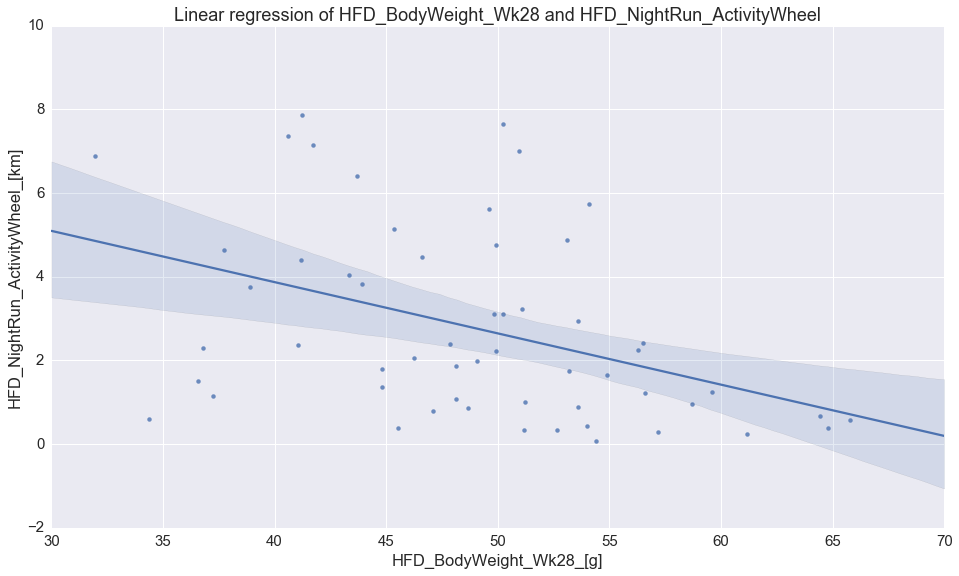

In [72]:
data1 = phenotype_df["Body Wt & Composition"]["HFD_BodyWeight_Wk28_[g]"].replace('x', np.nan, inplace=False) 
data2 = phenotype_df["Activity Wheel"]["HFD_NightRun_ActivityWheel_[km]"].replace('x', np.nan, inplace=False) 

data_both1 = pd.concat([data1,data2],axis=1)

plt.figure(figsize=(16, 9))
plt.title("Linear regression of HFD_BodyWeight_Wk28 and HFD_NightRun_ActivityWheel")
sns.regplot(x="HFD_BodyWeight_Wk28_[g]", y="HFD_NightRun_ActivityWheel_[km]", data=data_both1);